### Optimal Transport (OT) problem
One way to understand the motivation of Wasserstein distance or Earth Mover's distance is to condsider the optimal transport problem. That is, for a distribution of mass $\mu(x)$ on a space $X$, we wish to transport the mass in such a way that it is transformed into the distribution $v(x)$ on the same space. Transoforming the 'pile of earth' $\mu$ to the pile $v$. This problem only makes sense if the pile to be created has the same mass as the pile to be moved; therefore without loss of generality assume that $\mu$ and $v$ are probability distributions containing a total mass of 1. Assume also that this is given some cost function,
$$
c(x,y) \rightarrow [0, \infty)
$$
that gives the cost of transporting a unit mass from the $x$ to the point $y$.

From [Wasserstein metric](https://en.wikipedia.org/wiki/Wasserstein_metric)

### Earth Mover's Distance ([EMD](https://vincentherrmann.github.io/blog/wasserstein/))
By definition, the Earth Mover's distance is defined as: 
$$
\text{EMD}(P_r, P_{\theta}) = \inf_{\gamma \in \Pi} \sum_{x,y} \| x - y \| \gamma(x,y) =  \inf_{\gamma \in \Pi} \mathbb{E}_{(x,y) \sim \gamma} \|x-y\|
$$
where $P_r$ and $P_{\theta}$ are two different distributions, each with $l$ possible states $x$ and $y$ respectively. $\gamma$ is called a joined probability distribution and require that $\gamma \in \Pi(P_r, P_{\theta})$, and $\Pi(P_r, P_{\theta})$ is the set of all distributions whose marginals are $P_r$ or $P_{\theta}$ respectively. To get the Earth Mover's Distance, we have to multiply every value of $\gamma$ with the Euclidian distance between $x$ and $y$, and then take the $\inf$, aka infimum, of the expections.

To be valid, there two constrains must be satified.
\begin{align}
\sum_x \gamma(x,y) = P_r(y)\\
\sum_y \gamma(x,y) = P_{\theta}(x)
\end{align}

We can also set $\boldsymbol{\Gamma}=\gamma(x.y)$ and $\boldsymbol{D} = \| x - y\|$, with $\boldsymbol{\Gamma, D} \in \mathbb{R}^{lxl}$.
$$
\text{EMD}(P_r, P_{\theta}) = \inf_{\gamma \in \Pi} <\boldsymbol{\Gamma, D}>_F
$$
where $<,>_F$ is the Frobenius inner product (sum of all element-wise products).We can consider the $\text{EMD}(P_r, P_{\theta})$ as a kind of cost function such that the goal is to minimize the cost function in OT problem. 


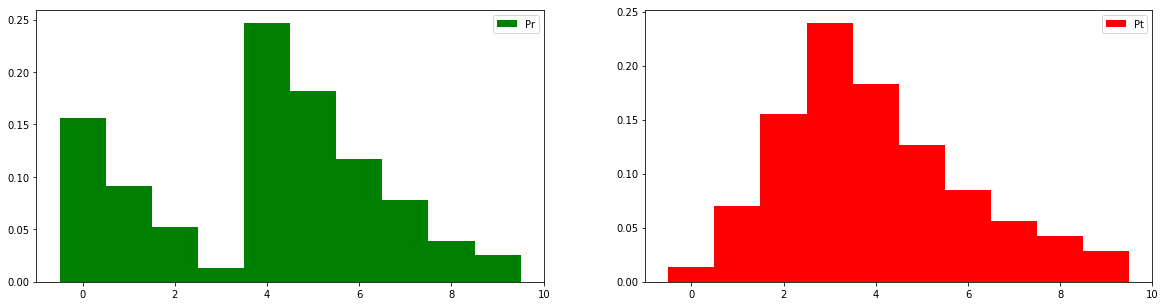

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
l = 10
Pr = np.array([12, 7,  4,  1, 19, 14, 9, 6, 3, 2]) 
Pt = np.array([ 1, 5, 11, 17, 13,  9, 6, 4, 3, 2 ])
# l = 2
# Pr = np.array([10, 1])
# Pt = np.array([1, 10])
Pr = Pr / np.sum(Pr)
Pt = Pt / np.sum(Pt)
#
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].bar(range(l), Pr, 1, color='green', alpha=1., label='Pr')
axes[0].legend()
#
axes[1].bar(range(l), Pt, 1, color='red', alpha=1., label='Pt')
axes[1].legend()

### Linear Programming
The $\boldsymbol{\Gamma}$ is called optimal transport plan. Once we find the minimum cost of the cost function, the corresponding value in $\boldsymbol{\Gamma}$ is optimal. How do we calculate it? It can be calculated using the generic method of Linear Programming (LP). 

Linear Programs are problems that can be expressed in canonical form as,
\begin{align}
&\text{minimize}& \quad \boldsymbol{c^Tx} \\
&\text{subject to}& \quad \boldsymbol{Ax = b} \\
&& \quad \boldsymbol{x >= 0}
\end{align}
whre $\boldsymbol{x}$ represents the vector of variables (to be calculated), $\boldsymbol{c}$ and $\boldsymbol{b}$ are vectors of (known) coefficients.

We formulate our problem as a linear program as:
\begin{align}
&\text{minimize}& \quad z = \boldsymbol{c^Tx} \rightarrow z = \inf_{\gamma \in \Pi} <\boldsymbol{\Gamma, D}>_F \\
&\text{subject to}& \quad \boldsymbol{Ax = b}  \rightarrow \sum_y \gamma(x,y) = P_{\theta}(x) \\
&& \quad \text{and} \quad \sum_x \gamma(x,y) = P_r(y)\\
&& \quad \boldsymbol{x >0 \rightarrow vec(\boldsymbol{\Gamma}) >= 0}
\end{align}

Therefore, 
\begin{align}
&\boldsymbol{x} = \text{vector}(\boldsymbol{\Gamma}) \\
&\boldsymbol{c} = \text{vector}(\boldsymbol{D}) \\
&\boldsymbol{b} = \begin{bmatrix} P_r \\ P_{\theta}    \end{bmatrix}
\end{align}

In [10]:
D = np.ndarray(shape=(l, l))
for i in range(l):
    for j in range(l):
        D[i, j] = abs(range(l)[i] - range(l)[j])
Ar = np.zeros(shape=(l, l, l))
At = np.zeros(shape=(l, l, l))
for i in range(l):
    for j in range(l):
        Ar[i, i, j] = l
        At[i, j, i] = l
A = np.concatenate((Ar.reshape((l, l**2)), At.reshape((l, l**2))), axis=0)
print(A)
b = np.concatenate((Pr, Pt), axis=0)
c = D.reshape((l**2))

[[10. 10. 10. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ...  0. 10.  0.]
 [ 0.  0.  0. ...  0.  0. 10.]]


EMD:  0.07062374245472824 

0.001     0.000     0.008     0.006     0.000     0.000     0.000     0.000     0.000     0.000     

0.000     0.007     0.002     0.000     0.000     0.000     0.000     0.000     0.000     0.000     

0.000     0.000     0.005     0.000     0.000     0.000     0.000     0.000     0.000     0.000     

0.000     0.000     0.000     0.001     0.000     0.000     0.000     0.000     0.000     0.000     

0.000     0.000     0.000     0.006     0.018     0.000     0.000     0.000     0.000     0.000     

0.000     0.000     0.000     0.010     0.000     0.008     0.000     0.000     0.000     0.000     

0.000     0.000     0.000     0.000     0.000     0.003     0.008     0.000     0.000     0.000     

0.000     0.000     0.000     0.000     0.000     0.002     0.000     0.006     0.000     0.000     

0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.004     0.000     

0.000     0.000     0.000     0.000     0.000     0.00

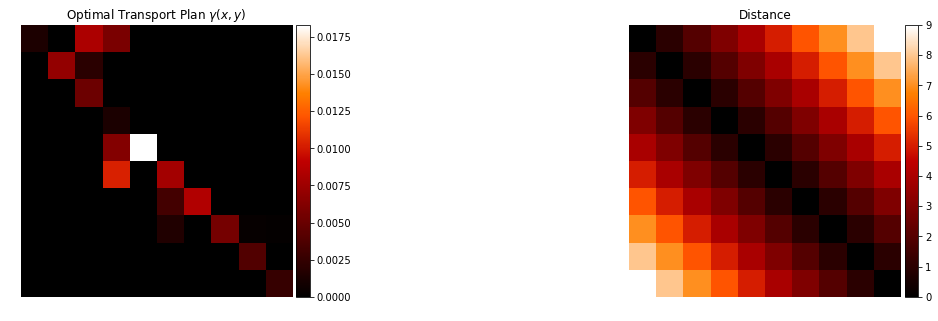

In [11]:
from scipy.optimize import linprog
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm

opt_res = linprog(c, A_eq=A, b_eq=b, bounds=[0, None])
emd = opt_res.fun
gamma = opt_res.x.reshape((l, l))
print("EMD: ", emd, "\n")
for i_l in range(l):
    for j_l in range(l):
        print("{0:.3f}".format(gamma[i_l][j_l]), end='     ')
    print('\n')
    

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,5))
surf1 = ax1.imshow(gamma, cmap=cm.gist_heat, interpolation='nearest')
ax1.axis('off')
ax1.set_title("Optimal Transport Plan $\gamma(x,y)$")
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(surf1, cax=cax)
#
surf2 = ax2.imshow(D, cmap=cm.gist_heat, interpolation='nearest')
ax2.set_title("Distance")
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
ax2.axis('off')
fig.colorbar(surf2, cax=cax)


### Dual Implementation
However, in practice, this kind of optimization is not practical in many cases, certainly not in domains where deep reinforcement learning are used. Because the $\gamma$ is scales exponentially with the number of dimensions of the input variable. But actually we don't care about the transport plan $\gamma$ or $\Gamma$. We only need the distance between two distributions, a single number, the EMD. For example, we plugin the EMD into the objective function of PPO (Proximal Policy Optimization) method, we should have,

$$
\text{maximize}\mathbb{E}[\frac{\pi_{\theta}(a_t | s_t)}{\pi_{\theta_{old}}(a_t|s_t)}A_t - \beta \text{KL}(\pi_{\theta_{old}}, \pi_{\theta})] \rightarrow \text{maximize}\mathbb{E}[\frac{\pi_{\theta}(a_t | s_t)}{\pi_{\theta_{old}}(a_t|s_t)}A_t - \beta \text{EMD}(\pi_{\theta_{old}}, \pi_{\theta})]
$$

The question now comes down to how can we find the $\text{EMD}(\pi_{\theta_{old}}, \pi_{\theta})$

#### Side Note: Lagrangian
**1. Standard form problem** (not necessarily convex)
\begin{align}
\text{minimize}& \quad f_0(x)\\
\text{subject to}& \quad f_i(x) \leq 0, \quad i = 1, ..., m \\
& \quad h_i(x) = 0, \quad i = 1, ..., p
\end{align}
variable $x\in \boldsymbol{R}^n$, domain $D$, optimal value $p^{\ast}$

**Lagrangian**: $L: \boldsymbol{R^n \times R^m \times R^p} \rightarrow \boldsymbol{R}$, with $\text{dom}L= D \times \boldsymbol{R}^m \times \boldsymbol{R}^p$.
\begin{align}
L(x, \lambda, v) = f_0(x) + \sum_{i=1}^{m}\lambda_i f_i(x) + \sum_{i}^{p}v_i h_i(x)
\end{align}
> * weighted sum of objective and constraint functions
* $\lambda_i$ is Lagrange multiplier associated with $f_i(x) \leq 0$
* $v_i$ is Lagrange multiplier associated with $h_i(x) = 0$

**2. Standard form Linear Programming (LP)**
\begin{align}
\text{minimize}& \quad c^Tx \\
\text{subject to}& \quad Ax = b, \\
& x \geq 0
\end{align}
**dual function**
> * Lagrangian is 
\begin{align}
L(x, \lambda, v) &= c^Tx + v^T(Ax-b) - \lambda^Tx \\
&= -b^Tv + (c + A^Tv - \lambda)^T x
\end{align}
* L is affine in $x$, hence
\begin{align}
g(\lambda, v) = \inf_x L(x, \lambda, v) =& -b^Tv \quad A^Tv -\lambda + c = 0 \\
& -\infty \quad \text{otherwise}
\end{align}
g is linear on affine domain ${(\lambda, v)|A^Tv - \lambda + c = 0}$, hence $g(\lambda, v)$ is concave

**lower bound property: **$p^{\ast} \geq -b^Tv$ if $A^Tv + c \geq 0$

### Dual Implementation
Now, we can confidently use the dual form to calculate the EMD. As we showed, the maximual value $g(\lambda, v)=-b^T v$ is the EMD. We can define,
$$
\boldsymbol{v} = [\boldsymbol{f}, \boldsymbol{g}]^T
$$
with $\boldsymbol{f}$, $\boldsymbol{g} \in \mathbb{R}^d$. This means 
\begin{align}
& EMD(P_r, P_{\theta}) = \text{max} g(\lambda, v) = - (\boldsymbol{f}^T P_r + \boldsymbol{g}^T P_{\theta}) \\
\text{subject to} \quad & A^T v + c \geq 0
\end{align}

Somehow, with Lipschitz continuity (with Lipschitz constant 1) and write $\| f\|_{L \leq 1}$. our dual form of the EMD is 
\begin{align}
\text{EMD}(P_r, P_{\theta}) = \text{sup}_{\| f\|_{L\leq1}} \mathbb{E}_{x \sim P_r}f(x) - E_{x \sim P_{\theta}} f(x)
\end{align}

### Wasserstein Distance
Lastly, we have to consider continuous probability distribution. We can of cause view them intuitively as discrete distributions with infinitely many states and ues a similar reasoning as described so far. However, we will try something else. Let our continuous distributions be $p_r$ and $p_{\theta}$, and the set of joined distribution with marginals $p_r$ and $p_{\theta}$ be $\pi(p_r, p_{\theta})$. Then the wasserstein distance is defined as,
\begin{align}
W(p_r, p_{\theta}) &= \inf_{\gamma \in \pi} \int_x \int_y \|x-y\| \gamma(x,y) dx dy \\
&= \inf_{\gamma \in \pi} \mathbb{E}_{x,y \sim \gamma} [\| x-y \|]
\end{align}

A result from [Kantorovich-Rubinstein Duality](https://en.wikipedia.org/wiki/Wasserstein_metric#Dual_representation_of_W1) shows $W$ is quivalent to 
\begin{align}
W(p_r, p_{\theta}) = \sup_{\| f\|_{L \leq 1}} \mathbb{E}_{x \sim p_r}[f(x)] - \mathbb{E}_{x \sim p_{\theta}}[f(x)]
\end{align}
where the supremum is taken over all 1-Lipschit functions.

dual EMD:  0.07062374245472847
[ 0.1  0.  -0.1 -0.2 -0.1  0.   0.1  0.2  0.1  0. ]
[-0.1  0.   0.1  0.2  0.1  0.  -0.1 -0.2 -0.1  0. ]


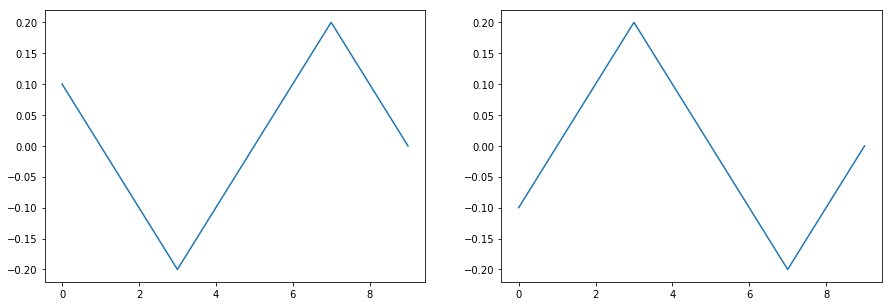

In [13]:
opt_res = linprog(-b, A.T, c, bounds=(None, None))

emd = -opt_res.fun
f = opt_res.x[0:l]
g = opt_res.x[l:]
print("dual EMD: ", emd)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (15, 5))
print(f)
print(g)
ax1.plot(range(l), f)
ax2.plot(range(l), g)

### Connecting with Reinforcement Learning. 

**PPO(Proximal Policy Optimization)**

Objection function:
$$
\underset{x} {\text{maximize}} \quad \mathbb{E}[\frac{\pi_{\theta}(a_t | s_t)}{\pi_{\theta_{old}}(a_t|s_t)}A_t - \beta \text{KL}(\pi_{\theta_{old}}, \pi_{\theta})] 
$$

\begin{align}
\underset{x} {\text{maximize}} & \quad \mathbb{E}[\frac{\pi_{\theta}(a_t | s_t)} {\pi_{\theta_{old}} (a_t|s_t)}A_t - \beta W(\pi_{\theta_{old}}, \pi_{\theta})] \\
& = \mathbb{E}[\frac{\pi_{\theta}(a_t | s_t)} {\pi_{\theta_{old}} (a_t|s_t)}A_t + \beta (\sup_{\| f\|_{L \leq 1}} \mathbb{E}_{x \sim p_r}[f(x)] - \mathbb{E}_{x \sim p_{\theta}}[f(x)] )
\end{align}